<a href="https://colab.research.google.com/github/RulerScarlett/Datacon-ML-task-3/blob/main/ML_mini_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ОбУЧЕНИЕ ПРОСТЫХ МОДЕЛЕЙ РЕГРЕСИИ**




In [2]:
import sys
import math
from fractions import Fraction
from unittest.mock import patch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import os
import pandas as pd
from lightgbm import LGBMRegressor
import joblib

# Исправление для numpy.float
if not hasattr(np, 'float'):
    np.float = float

# Исправление для fractions.gcd
sys.modules['fractions'].gcd = math.gcd





 # ЗАГРУЗИТЕ ДАТАСЕТ В ВИДЕ ФАЙЛА С ПРЕДЫДУЩЕГО ТАСКА
 # ДФ ДАТАСЕТА
dataset_path = '/content/dataset.csv'



df = pd.read_csv(dataset_path, sep=';', on_bad_lines='skip')
def preparedf():

  df = pd.read_csv(dataset_path, sep=';', on_bad_lines='skip')

   # Логарифмируем Standard Value
  df.iloc[:, 2] = np.log10(df.iloc[:, 2])
  print(df.iloc[:, 2])


   # Стандартизация
  df = df.drop(columns = df.columns[:2])
  df = df.astype(np.float32)
  print(df.dtypes)
  df = df.select_dtypes(include=[np.number])
  indexes=[]
  for index, row in df.iterrows():
    if (np.isnan(df['Standard Value'][index]) or np.isinf(df['Standard Value'][index])):
      indexes.append(index)
  df = df.drop(indexes, axis=0)
  print(df)
  df = df
  return df
dfs = preparedf()


 # Делаем обучающую выборку, одинаково для всех моделей
def make_train():
  df = dfs

   # x - все столбцы с дескрипторами
   # y - только столбец значений IC50
  x = df.drop(columns = ['Standard Value'])
  y = df['Standard Value']
  print("Number of NaN values in y:", df['Standard Value'].isna().sum())

  bins = pd.qcut(y, q=10, duplicates="drop", labels=False)
  x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    stratify=bins
  )
  print("Train:", x_train.shape, " Test:", x_test.shape)
  return x_train, x_test, y_train, y_test
make_train()





seed=42

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


0       1.602060
1       3.230449
2       1.698970
3       3.653213
4       2.278754
          ...   
4170    5.112940
4171    1.000000
4172    4.167317
4173    3.876795
4174    2.944483
Name: Standard Value, Length: 4175, dtype: float64
Standard Value    float32
ABC               float32
nAcid             float32
nBase             float32
nAromAtom         float32
                   ...   
n10FaRing         float32
nFARing           float32
n9FARing          float32
n10FARing         float32
TopoShapeIndex    float32
Length: 163, dtype: object
      Standard Value        ABC  nAcid  nBase  nAromAtom  nSpiro  nBridgehead  \
0           1.602060  19.751326    0.0    0.0        6.0     0.0          0.0   
1           3.230449  19.495098    0.0    0.0       18.0     0.0          0.0   
2           1.698970  22.074789    0.0    0.0       15.0     0.0          0.0   
3           3.653213  17.848785    0.0    0.0        6.0     0.0          0.0   
4           2.278754  31.554907    0.0    0.

(            ABC  nAcid  nBase  nAromAtom  nSpiro  nBridgehead   nN   nS   nP  \
 2073  17.373779    0.0    0.0       17.0     0.0          0.0  0.0  2.0  0.0   
 1140  18.787992    0.0    0.0       17.0     0.0          0.0  2.0  1.0  0.0   
 1462  17.815569    0.0    0.0       17.0     0.0          0.0  6.0  0.0  0.0   
 2980  14.199155    0.0    0.0       16.0     0.0          0.0  1.0  0.0  0.0   
 2563  29.145857    0.0    1.0       21.0     0.0          0.0  7.0  0.0  0.0   
 ...         ...    ...    ...        ...     ...          ...  ...  ...  ...   
 3802  22.392475    0.0    0.0       21.0     0.0          0.0  1.0  1.0  0.0   
 1651  21.904148    1.0    0.0       18.0     0.0          0.0  0.0  1.0  0.0   
 1166  18.360916    0.0    0.0       11.0     0.0          0.0  4.0  0.0  0.0   
 3254  21.884518    0.0    0.0       11.0     0.0          0.0  4.0  1.0  0.0   
 1415  19.027941    0.0    0.0       12.0     0.0          0.0  2.0  2.0  0.0   
 
        nF  ...  nFRing  n

In [3]:
dfs = preparedf()
print(dfs)

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


0       1.602060
1       3.230449
2       1.698970
3       3.653213
4       2.278754
          ...   
4170    5.112940
4171    1.000000
4172    4.167317
4173    3.876795
4174    2.944483
Name: Standard Value, Length: 4175, dtype: float64
Standard Value    float32
ABC               float32
nAcid             float32
nBase             float32
nAromAtom         float32
                   ...   
n10FaRing         float32
nFARing           float32
n9FARing          float32
n10FARing         float32
TopoShapeIndex    float32
Length: 163, dtype: object
      Standard Value        ABC  nAcid  nBase  nAromAtom  nSpiro  nBridgehead  \
0           1.602060  19.751326    0.0    0.0        6.0     0.0          0.0   
1           3.230449  19.495098    0.0    0.0       18.0     0.0          0.0   
2           1.698970  22.074789    0.0    0.0       15.0     0.0          0.0   
3           3.653213  17.848785    0.0    0.0        6.0     0.0          0.0   
4           2.278754  31.554907    0.0    0.

In [4]:
x_train, x_test, y_train, y_test = make_train()

Number of NaN values in y: 0
Train: (3334, 162)  Test: (834, 162)


In [5]:
from sklearn.ensemble import RandomForestRegressor

 # RandomForestRegressor из scikit-learn
forest = RandomForestRegressor(random_state=seed)
forest.fit(x_train, y_train)

y_pred = forest.predict(x_test)

mae = sk.metrics.mean_absolute_error(y_test, forest.predict(x_test))
r2  = sk.metrics.r2_score(y_test, forest.predict(x_test))

print(f"forest MAE: {mae:.4f}")
print(f"forest R2 : {r2:.4f}")

forest MAE: 0.6347
forest R2 : 0.4936


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


 # XGradientBoost из scikit-learn
XGboost = GradientBoostingRegressor(random_state=seed, learning_rate=0.01, n_estimators=1000, max_depth=6)
XGboost.fit(x_train, y_train)
XGboost.score(x_test, y_test)

y_pred = XGboost.predict(x_test)

mae = sk.metrics.mean_absolute_error(y_test, XGboost.predict(x_test))
r2  = sk.metrics.r2_score(y_test, XGboost.predict(x_test))

print(f"XGboost MAE: {mae:.4f}")
print(f"XGboost R2 : {r2:.4f}")

In [ ]:
!pip install torch
!pip install pytorch_lightning

INFO:lightning_fabric.utilities.seed:Seed set to 42
Epoch 1:   0%|          | 0/3334 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Epoch 20: 100%|██████████| 3334/3334 [00:13<00:00, 239.62it/s]


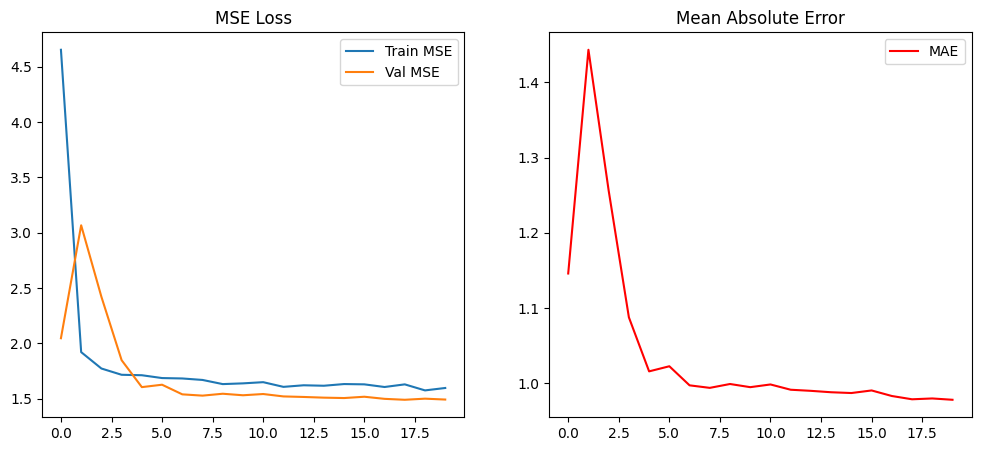

In [8]:
# Формирование нейросети MLP (4 скрытых слоя и дропауты)
import torch
from pytorch_lightning import seed_everything
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
#os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

seed_everything(seed)


class DeepMLP(nn.Module):
    def __init__(self, in_size, hid_size, out_size, dropout = 0.5):
        super().__init__()
        self.net = nn.Sequential(nn.Linear(in_size, hid_size),
                                 nn.Tanh(),
                                 nn.Dropout(dropout),
                                 nn.LayerNorm(hid_size),

                                 nn.Linear(hid_size, hid_size // 2),
                                 nn.Tanh(),
                                 nn.Dropout(dropout),
                                 nn.LayerNorm(hid_size // 2),

                                 nn.Linear(hid_size // 2, hid_size // 4),
                                 nn.Tanh(),
                                 nn.Dropout(dropout),
                                 nn.LayerNorm(hid_size // 4),

                                 nn.Linear(hid_size // 4, hid_size // 8),
                                 nn.Tanh(),
                                 nn.Dropout(dropout),
                                 nn.LayerNorm(hid_size // 8),

                                 nn.Linear(hid_size // 8, hid_size // 16),
                                 nn.Tanh(),
                                 nn.Dropout(dropout),
                                 nn.LayerNorm(hid_size // 16),

                                 nn.Linear(hid_size // 16, out_size))
    def forward(self, x):
        return self.net(x)


#print(x_train.shape[1])
device = torch.device('cuda')
model = DeepMLP(in_size = x_train.shape[1], hid_size = 162, out_size = 1).to('cpu')

#x_train = np.array(x_train)
#y_train = np.array(y_train)
x_train_tensor = torch.tensor(x_train.values, dtype=torch.float32).to('cpu')
y_train_tensor = torch.tensor(y_train.values).to('cpu')  # For pandas Series

x_test_tensor = torch.tensor(x_test.values, dtype = torch.float32).to('cpu')
y_test_tensor = torch.tensor(y_test.values).to('cpu')
x_test_tensor = torch.tensor(x_test.values, dtype = torch.float32).to('cpu')
y_test_tensor = torch.tensor(y_test.values).to('cpu')

#print(x_train_tensor.shape[0])
#print(x_test_tensor.shape[0])

train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)


#sz = 16
train_loaded = DataLoader(train_dataset, shuffle = True, num_workers = 2, pin_memory = True)
test_loaded = DataLoader(test_dataset, shuffle = True, num_workers = 2, pin_memory = True)

criterion = nn.MSELoss()  # MSE для регрессии
optimizer = optim.Adam(model.parameters(), lr=0.0001)

history = {'train_loss': [], 'val_loss': [], 'mae' : []}
best_val_acc = 0.0

num_epochs = 20
best_loss = np.inf
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in tqdm(train_loaded, desc=f'Epoch {epoch+1}'):
        inputs = inputs.to('cpu')
        labels = labels.float().to('cpu')  # Метки как float для регрессии

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loaded)

    # Валидация
    model.eval()
    val_loss = 0.0
    total_mae = 0.0

    with torch.no_grad():
        for inputs, labels in test_loaded:
            inputs = inputs.to('cpu')
            labels = labels.float().to('cpu')

            outputs = model(inputs)
            val_loss += criterion(outputs, labels).item()
            total_mae += torch.abs(outputs - labels).sum().item()

    val_loss /= len(test_loaded)
    mae = total_mae / len(test_loaded.dataset)  # Средняя абсолютная ошибка

    # Логирование
    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    history['mae'].append(mae)
    '''
    # Сохранение лучшей модели
    if val_loss < best_loss:
        best_loss = val_loss
        torch.save(model.state_dict(), 'best_regressor.pth')
'''

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train MSE')
plt.plot(history['val_loss'], label='Val MSE')
plt.legend()
plt.title('MSE Loss')

plt.subplot(1, 2, 2)
plt.plot(history['mae'], color='red', label='MAE')
plt.legend()
plt.title('Mean Absolute Error')

plt.show()

In [13]:
print(history)

{'train_loss': [0.0027746511099189437, 0.002310561514872675, 0.0019096795483164444, 0.0015689786639756281, 0.0012865295606805693, 0.001057152869092093, 0.0008772730116726769, 0.0007432988608927672, 0.0006466148133034703, 0.0005802751168534418, 0.0005365793644782718, 0.000508961144269555, 0.0004916983613896264, 0.00048122747095075564, 0.00047503213754064447, 0.00047129594911430315, 0.0004691042397424175, 0.0004678371289404305, 0.0004670739139676807, 0.0004666414358913822], 'val_loss': [0.010040209993002888, 0.008319195324268464, 0.006839525441319586, 0.005594403371963222, 0.004578918101808046, 0.0037663690229972836, 0.0031422112062568053, 0.002687673163522394, 0.0023698481584525912, 0.0021549857984357428, 0.002016858782034546, 0.0019309936004690094, 0.001878307728347094, 0.0018470863698601659, 0.0018281775042256775, 0.0018171876495902443, 0.0018107507553643716, 0.0018070745766365103, 0.0018048902065499837, 0.001803710565890546], 'mae': [2.629778541749616, 2.3531389498381876, 2.090558200

Epoch 1: 100%|██████████| 3334/3334 [03:32<00:00, 15.71it/s]


Epoch 1/20, Train Loss: 0.0028, Test Loss: 0.0100, MAE: 2.629778541749616


Epoch 2: 100%|██████████| 3334/3334 [03:31<00:00, 15.79it/s]


Epoch 2/20, Train Loss: 0.0023, Test Loss: 0.0083, MAE: 2.3531389498381876


Epoch 3: 100%|██████████| 3334/3334 [03:33<00:00, 15.64it/s]


Epoch 3/20, Train Loss: 0.0019, Test Loss: 0.0068, MAE: 2.0905582004313845


Epoch 4: 100%|██████████| 3334/3334 [03:41<00:00, 15.08it/s]


Epoch 4/20, Train Loss: 0.0016, Test Loss: 0.0056, MAE: 1.8519866091313122


Epoch 5: 100%|██████████| 3334/3334 [03:40<00:00, 15.14it/s]


Epoch 5/20, Train Loss: 0.0013, Test Loss: 0.0046, MAE: 1.64196710249217


Epoch 6: 100%|██████████| 3334/3334 [03:34<00:00, 15.56it/s]


Epoch 6/20, Train Loss: 0.0011, Test Loss: 0.0038, MAE: 1.461551688343501


Epoch 7: 100%|██████████| 3334/3334 [03:33<00:00, 15.58it/s]


Epoch 7/20, Train Loss: 0.0009, Test Loss: 0.0031, MAE: 1.317226196864812


Epoch 8: 100%|██████████| 3334/3334 [03:38<00:00, 15.26it/s]


Epoch 8/20, Train Loss: 0.0007, Test Loss: 0.0027, MAE: 1.2075774991255013


Epoch 9: 100%|██████████| 3334/3334 [03:33<00:00, 15.58it/s]


Epoch 9/20, Train Loss: 0.0006, Test Loss: 0.0024, MAE: 1.1302106806414305


Epoch 10: 100%|██████████| 3334/3334 [03:35<00:00, 15.45it/s]


Epoch 10/20, Train Loss: 0.0006, Test Loss: 0.0022, MAE: 1.0753618575972048


Epoch 11: 100%|██████████| 3334/3334 [03:40<00:00, 15.10it/s]


Epoch 11/20, Train Loss: 0.0005, Test Loss: 0.0020, MAE: 1.0408427655268058


Epoch 12: 100%|██████████| 3334/3334 [03:44<00:00, 14.83it/s]


Epoch 12/20, Train Loss: 0.0005, Test Loss: 0.0019, MAE: 1.0204154933385141


Epoch 13: 100%|██████████| 3334/3334 [03:41<00:00, 15.02it/s]


Epoch 13/20, Train Loss: 0.0005, Test Loss: 0.0019, MAE: 1.0078959086244341


Epoch 14: 100%|██████████| 3334/3334 [03:35<00:00, 15.50it/s]


Epoch 14/20, Train Loss: 0.0005, Test Loss: 0.0018, MAE: 1.0001892144445608


Epoch 15: 100%|██████████| 3334/3334 [03:32<00:00, 15.72it/s]


Epoch 15/20, Train Loss: 0.0005, Test Loss: 0.0018, MAE: 0.995488456256098


Epoch 16: 100%|██████████| 3334/3334 [03:33<00:00, 15.65it/s]


Epoch 16/20, Train Loss: 0.0005, Test Loss: 0.0018, MAE: 0.9926405474722243


Epoch 17: 100%|██████████| 3334/3334 [03:33<00:00, 15.59it/s]


Epoch 17/20, Train Loss: 0.0005, Test Loss: 0.0018, MAE: 0.9909252447190044


Epoch 18: 100%|██████████| 3334/3334 [03:36<00:00, 15.39it/s]


Epoch 18/20, Train Loss: 0.0005, Test Loss: 0.0018, MAE: 0.9899349775817469


Epoch 19: 100%|██████████| 3334/3334 [03:36<00:00, 15.42it/s]


Epoch 19/20, Train Loss: 0.0005, Test Loss: 0.0018, MAE: 0.9893638758922366


Epoch 20: 100%|██████████| 3334/3334 [03:36<00:00, 15.42it/s]


Epoch 20/20, Train Loss: 0.0005, Test Loss: 0.0018, MAE: 0.9890737925216162


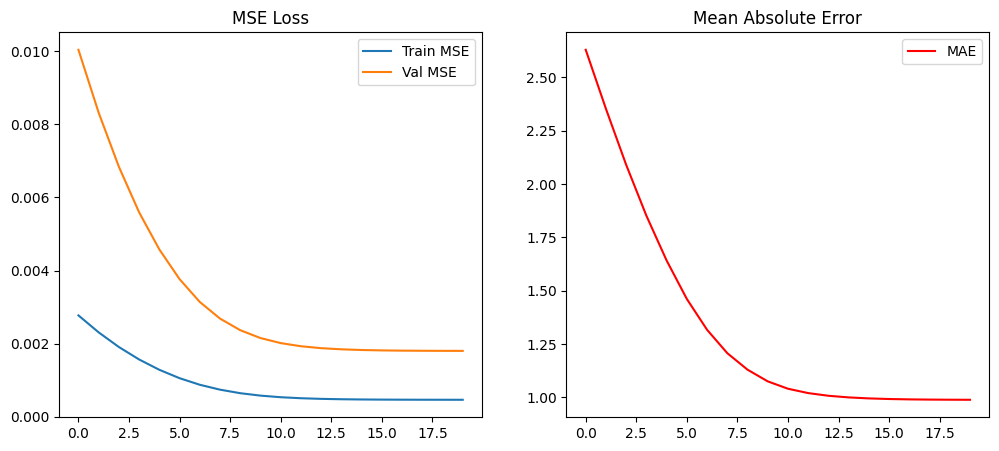

In [12]:
# нейросеть с реккурентно убывающим количеством выходных нейронов
import torch
from pytorch_lightning import seed_everything
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt
import os


class DeepCNN(nn.Module):
    def __init__(self, hidden_size, dropout = 0.5):
        super().__init__()

        layers = []
        for i in range(0, hidden_size):
            layers.extend([
                nn.Linear(hidden_size - i, hidden_size - i - 1),
                nn.Tanh(),
                nn.Dropout(dropout),
                nn.LayerNorm(hidden_size - i - 1)
            ])
        self.net = nn.Sequential(*layers, nn.Linear(hidden_size - i - 1, 1))

    def forward(self, x):

        return self.net(x)

# Задаем устройство, на котором будет происходить обучение

device = torch.device(device)
model = DeepCNN(hidden_size = 162).to(device)

# Переводим датасеты в тензорный формат и загружаем в DataLoader

x_train_tensor = torch.tensor(x_train.values, dtype=torch.float32).to('cpu')
y_train_tensor = torch.tensor(y_train.values).to('cpu')  # For pandas Series

x_test_tensor = torch.tensor(x_test.values, dtype = torch.float32).to('cpu')
y_test_tensor = torch.tensor(y_test.values).to('cpu')
x_test_tensor = torch.tensor(x_test.values, dtype = torch.float32).to('cpu')
y_test_tensor = torch.tensor(y_test.values).to('cpu')

train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loaded = DataLoader(train_dataset, batch_size = 1, shuffle = True, num_workers = 0, pin_memory = False)
test_loaded = DataLoader(test_dataset, batch_size = 1, shuffle = False, num_workers = 0, pin_memory = False)

criterion = nn.MSELoss()  # MSE для регрессии
optimizer = optim.Adam(model.parameters(), lr = 0.0001) # Оптимизатор ADAM для градиента Back Propagation

history = {'train_loss': [], 'val_loss': [], 'mae' : []}

num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, values in tqdm(train_loaded, desc=f'Epoch {epoch+1}'):
        inputs = inputs.to(device)
        values = values.to(device)  # Метки как float для регрессии

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, values)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loaded)

    # Валидация

    model.eval()
    val_loss = 0.0
    total_mae = 0.0
    best_loss = 0.8
    with torch.no_grad():
        for inputs, values in test_loaded:
            inputs = inputs.to(device)
            values = values.float().to(device)

            outputs = model(inputs)
            val_loss += criterion(outputs, values).item()
            total_mae += torch.abs(outputs - values).sum().item()

    val_loss /= len(test_loaded)
    mae = total_mae / len(test_loaded.dataset)  # Средняя абсолютная ошибка

    # Сохранение лучшей модели

    if val_loss <= best_loss:
        best_loss = val_loss
        torch.save(model.state_dict(), 'best_MLPregressor.pth')

    # Логирование

    train_loss = train_loss / len(train_loaded.dataset)
    val_loss = val_loss / len(test_loaded.dataset)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {val_loss:.4f}, MAE: {mae}')

    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    history['mae'].append(mae)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train MSE')
plt.plot(history['val_loss'], label='Val MSE')
plt.legend()
plt.title('MSE Loss')

plt.subplot(1, 2, 2)
plt.plot(history['mae'], color='red', label='MAE')
plt.legend()
plt.title('Mean Absolute Error')
plt.savefig('Res_MLPRegression.png')

/usr/local/lib/python3.11/dist-packages/torch/nn/init.py:511: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")
Epoch 1:   0%|          | 0/3334 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Epoch 1: 100%|██████████| 3334/3334 [03:59<00:00, 13.95it/s]


Epoch 1/5, Train Loss: 0.0005, Test Loss: 0.0019, MAE: 1.0151383525176014


Epoch 2: 100%|██████████| 3334/3334 [03:51<00:00, 14.39it/s]


Epoch 2/5, Train Loss: 0.0005, Test Loss: 0.0018, MAE: 0.9964704217670632


Epoch 3: 100%|██████████| 3334/3334 [03:50<00:00, 14.47it/s]


Epoch 3/5, Train Loss: 0.0005, Test Loss: 0.0018, MAE: 0.9961449581084492


Epoch 4: 100%|██████████| 3334/3334 [03:48<00:00, 14.61it/s]


Epoch 4/5, Train Loss: 0.0005, Test Loss: 0.0018, MAE: 0.9977363083574126


Epoch 5: 100%|██████████| 3334/3334 [03:52<00:00, 14.37it/s]


Epoch 5/5, Train Loss: 0.0005, Test Loss: 0.0018, MAE: 0.9947116816644188


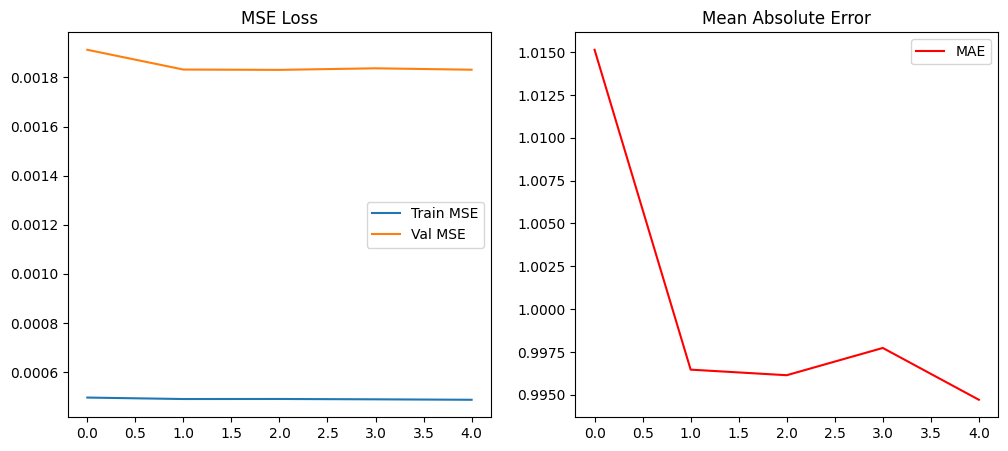

In [23]:
# Сверточная нейросеть с реккурентно убывающим количеством выходных нейронов
import torch
from pytorch_lightning import seed_everything
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt
import os


import torch
import torch.nn as nn

class Flat1DCNN(nn.Module):
    def __init__(self, in_channels=1, base_channels=32, out_size=1, dropout=0.3):
        super().__init__()

        self.net = nn.Sequential(



            nn.Conv1d(in_channels, base_channels, kernel_size=5, padding=2),
            nn.BatchNorm1d(base_channels),
            nn.LeakyReLU(0.1),
            nn.Dropout(dropout),


            nn.Conv1d(base_channels, base_channels*2, kernel_size=3, padding=1),
            nn.BatchNorm1d(base_channels*2),
            nn.LeakyReLU(0.1),
            nn.Dropout(dropout),


            nn.Conv1d(base_channels*2, base_channels*4, kernel_size=3, padding=1),
            nn.BatchNorm1d(base_channels*4),
            nn.LeakyReLU(0.1),
            nn.Dropout(dropout),


            nn.AdaptiveAvgPool1d(1),


            nn.Flatten(),
            nn.Linear(base_channels*4, out_size)
        )

    def forward(self, x):

        return self.net(x)

# Задаем устройство, на котором будет происходить обучение

device = torch.device(device)
model = DeepCNN(hidden_size = 162).to(device)

# Переводим датасеты в тензорный формат и загружаем в DataLoader

x_train_tensor = torch.tensor(x_train.values, dtype=torch.float32).to('cpu')
y_train_tensor = torch.tensor(y_train.values).to('cpu')

x_test_tensor = torch.tensor(x_test.values, dtype = torch.float32).to('cpu')
y_test_tensor = torch.tensor(y_test.values).to('cpu')
x_test_tensor = torch.tensor(x_test.values, dtype = torch.float32).to('cpu')
y_test_tensor = torch.tensor(y_test.values).to('cpu')

train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loaded = DataLoader(train_dataset, batch_size = 1, shuffle = True, num_workers = 0, pin_memory = False)
test_loaded = DataLoader(test_dataset, batch_size = 1, shuffle = False, num_workers = 0, pin_memory = False)

criterion = nn.MSELoss()  # MSE для регрессии
optimizer = optim.SGD(
    model.parameters(),
    lr=0.01,
    momentum=0.8,
    weight_decay=0.001,
    nesterov=True
)

history = {'train_loss': [], 'val_loss': [], 'mae' : []}

num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, values in tqdm(train_loaded, desc=f'Epoch {epoch+1}'):
        inputs = inputs.to(device)
        values = values.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, values)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loaded)

    # Валидация

    model.eval()
    val_loss = 0.0
    total_mae = 0.0

    with torch.no_grad():
      for inputs, values in test_loaded:

        inputs = inputs.to(device)
        values = values.float().to(device)

        outputs = model(inputs)


        val_loss += criterion(outputs, values).item() * inputs.size(0)

        total_mae += torch.abs(outputs - values).sum().item()


    val_loss /= len(test_loaded.dataset)
    mae = total_mae / len(test_loaded.dataset)

    # Сохранение лучшей модели

    if val_loss <= best_loss:
        best_loss = val_loss
        torch.save(model.state_dict(), 'best_CNNregressor.pth')

    # Логирование

    train_loss = train_loss / len(train_loaded.dataset)
    val_loss = val_loss / len(test_loaded.dataset)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {val_loss:.4f}, MAE: {mae}')

    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    history['mae'].append(mae)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train MSE')
plt.plot(history['val_loss'], label='Val MSE')
plt.legend()
plt.title('MSE Loss')

plt.subplot(1, 2, 2)
plt.plot(history['mae'], color='red', label='MAE')
plt.legend()
plt.title('Mean Absolute Error')
plt.savefig('Res_CNNRegression.png')